In [2]:
import json
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create an empty list to store the data
data = []

# Open the file and read it line by line
with open('goodreads_reviews_young_adult.json', 'r') as f:
    for i, line in enumerate(f):
        # Load the JSON object from the line
        review = json.loads(line)
        # Append the review to the data list
        data.append(review)
        # Break out of the loop after reading 10 lines
        if i >= 99:
            break

# Convert the data to a pandas dataframe
df = pd.json_normalize(data)

# Print the first 5 rows of the dataframe
print(df.head())

# Get basic statistics about the ratings
print(df['rating'].describe())


                            user_id   book_id  \
0  8842281e1d1347389f2ab93d60773d4d   2767052   
1  7504b2aee1ecb5b2872d3da381c6c91e  23302416   
2  f8a89075dc6de14857561522e729f82c  18053080   
3  f8a89075dc6de14857561522e729f82c  17383543   
4  f8a89075dc6de14857561522e729f82c  16651458   

                          review_id  rating  \
0  248c011811e945eca861b5c31a549291       5   
1  84c0936a0f9868f38e75d2f9a5cb761e       5   
2  785c8db878f4009da9741dea51f641da       4   
3  34dc3c45d07e82718b05e73167259aef       2   
4  d8d6b590780256fef7ae4a9550fe3e0d       5   

                                         review_text  \
0  I cracked and finally picked this up. Very enj...   
1  I read this book because my fifth grade son wa...   
2  Though the book started out slow and only star...   
3  *Update - 10/27/13* - After some sleep, I thin...   
4  This is a moving, heartbreaking, view into a l...   

                       date_added                    date_updated  \
0  Wed Jan 13 13

In [3]:
# Create an empty list to store the data
data = []

# Open the file and read it line by line
with open('goodreads_reviews_young_adult.json', 'r') as f:
    for line in f:
        # Load the JSON object from the line
        review = json.loads(line)
        # Append the review to the data list
        data.append(review)

# Convert the data to a pandas dataframe
df = pd.json_normalize(data)

# Select 10 random ratings
random_ratings = df.sample(n=100)['rating']

# Print the random ratings
print(random_ratings.describe())

count    100.000000
mean       3.730000
std        1.362225
min        0.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64


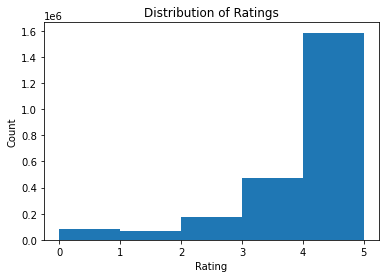

In [4]:
plt.hist(df['rating'], bins=5)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

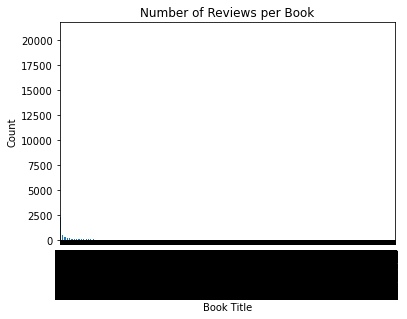

In [6]:
book_counts = df['book_id'].value_counts()
book_counts.plot(kind='bar', )
plt.title('Number of Reviews per Book')
plt.xlabel('Book Title')
plt.ylabel('Count')
plt.show()

In [7]:
with open('goodreads_reviews_young_adult.json', 'r') as f:
    rating_sum = 0
    rating_count = 0
    for i, line in enumerate(f):
        # Load the JSON object from the line
        review = json.loads(line)
        # Extract the rating from the review
        rating = review['rating']
        # Add the rating to the sum and increment the count
        rating_sum += rating
        rating_count += 1
        # Break out of the loop after computing the average of 50 ratings
        if rating_count >= 50:
            break

# Compute the average rating
average_rating = rating_sum / rating_count

# Print the average rating
print("Average rating of the first 50 reviews: ", average_rating)

Average rating of the first 50 reviews:  4.26


In [8]:
import json
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# load the reviews from the JSON file into a Pandas DataFrame
reviews = []
with open('goodreads_reviews_young_adult.json', 'r') as f:
    for line in f:
        review = json.loads(line)
        reviews.append((review['review_text'], review['rating']))
df = pd.DataFrame(reviews, columns=['text', 'rating'])

# define a function to map ratings to sentiment labels
def map_rating_to_sentiment(rating):
    if rating >= 3:
        return 'positive'
    else:
        return 'negative'

# map the ratings to sentiment labels
df['sentiment'] = df['rating'].apply(map_rating_to_sentiment)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# vectorize the text data using a bag-of-words model
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# train a naive bayes classifier on the training data
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# evaluate the performance of the classifier on the testing data
accuracy = clf.score(X_test_vec, y_test)
print("Accuracy of the classifier on the testing set: {:.2f}%".format(accuracy * 100))

Accuracy of the classifier on the testing set: 86.83%


In [10]:
import json
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
import datetime

# start time
start_time = datetime.datetime.now()

# load the reviews from the JSON file into a Pandas DataFrame
reviews = []
with open('goodreads_reviews_young_adult.json', 'r') as f:
    for line in f:
        review = json.loads(line)
        reviews.append((review['review_text'], review['rating']))
df = pd.DataFrame(reviews, columns=['text', 'rating'])

# define a function to map ratings to sentiment labels
def map_rating_to_sentiment(rating):
    if rating >= 3:
        return 'positive'
    else:
        return 'negative'

# map the ratings to sentiment labels
df['sentiment'] = df['rating'].apply(map_rating_to_sentiment)

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# vectorize the text data using a bag-of-words model
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# train a naive bayes classifier on the training data
clf = MultinomialNB()
clf.fit(X_train_vec, y_train)

# evaluate the performance of the classifier on the testing data
accuracy = clf.score(X_test_vec, y_test)
print("Accuracy of the classifier on the testing set: {:.2f}%".format(accuracy * 100))

# end time
end_time = datetime.datetime.now()

# total time
delta_time = end_time - start_time
print(f"Elapsed time: {delta_time.total_seconds()} seconds")

Accuracy of the classifier on the testing set: 86.83%
Elapsed time: 385.875036 seconds
